# **PCA: Visualize and classify MNIST handwritten images**
ref: https://en.wikipedia.org/wiki/MNIST_database

* author: Prasert Kanawattanachai
* YouTube: https://www.youtube.com/prasertcbs
* Chulalongkorn Business School

In [1]:
from IPython.display import YouTubeVideo
# YouTubeVideo('', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


In [4]:
pd.Timestamp.now()

Timestamp('2021-05-10 08:42:57.707009')

## **read MNIST data**

In [5]:
data_file='https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [6]:
D=df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
D.shape

(5000, 784)

target = 6


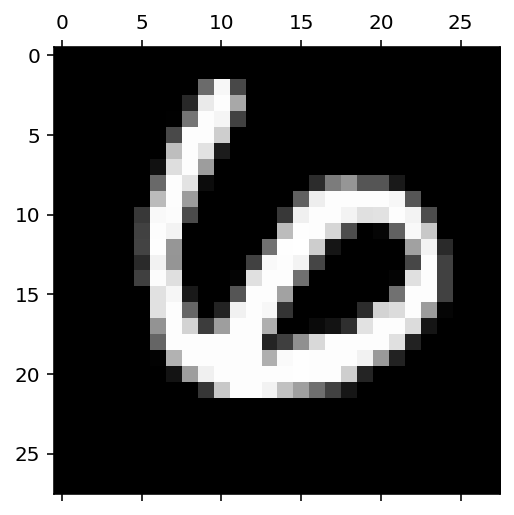

In [7]:
n=np.random.randint(0, D.shape[0])
print(f"target = {df['class'].iloc[n]}")
plt.matshow(D[n].reshape(28, -1), cmap='gray')

In [8]:
df['class'].to_numpy()[:10] # target/label

array([3, 3, 1, 1, 3, 9, 1, 4, 2, 4])

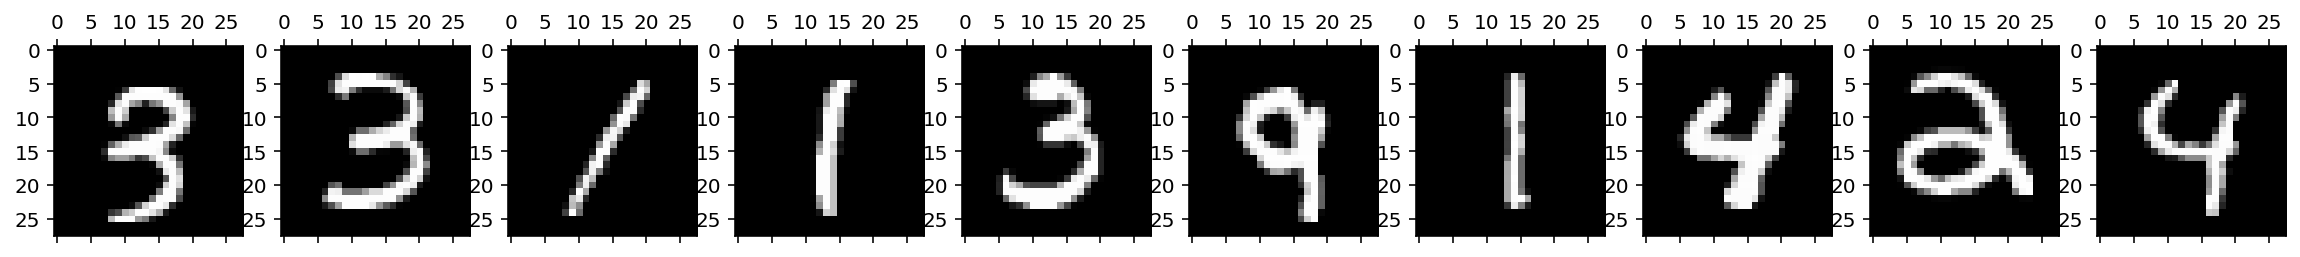

In [9]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(D[i].reshape(28, -1), cmap='gray') for i in range(n)];


# train test split 

In [10]:
from sklearn.model_selection import train_test_split
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=7, stratify=y)

In [11]:
X_train.shape

(4000, 784)

In [12]:
X_test.shape

(1000, 784)

In [13]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Principal Component Analysis (PCA)**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **StandardScaler (z-score)**
$z=\frac{x_i-\bar{x}}{sd}$

In [15]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

## **StandardScaler (z-score)**
$z=\frac{x_i-\bar{x}}{sd}$

In [16]:
X_train_t[:, 400].mean()


0.0

In [17]:
X_train_t[:, 400].std()

1.0

In [18]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

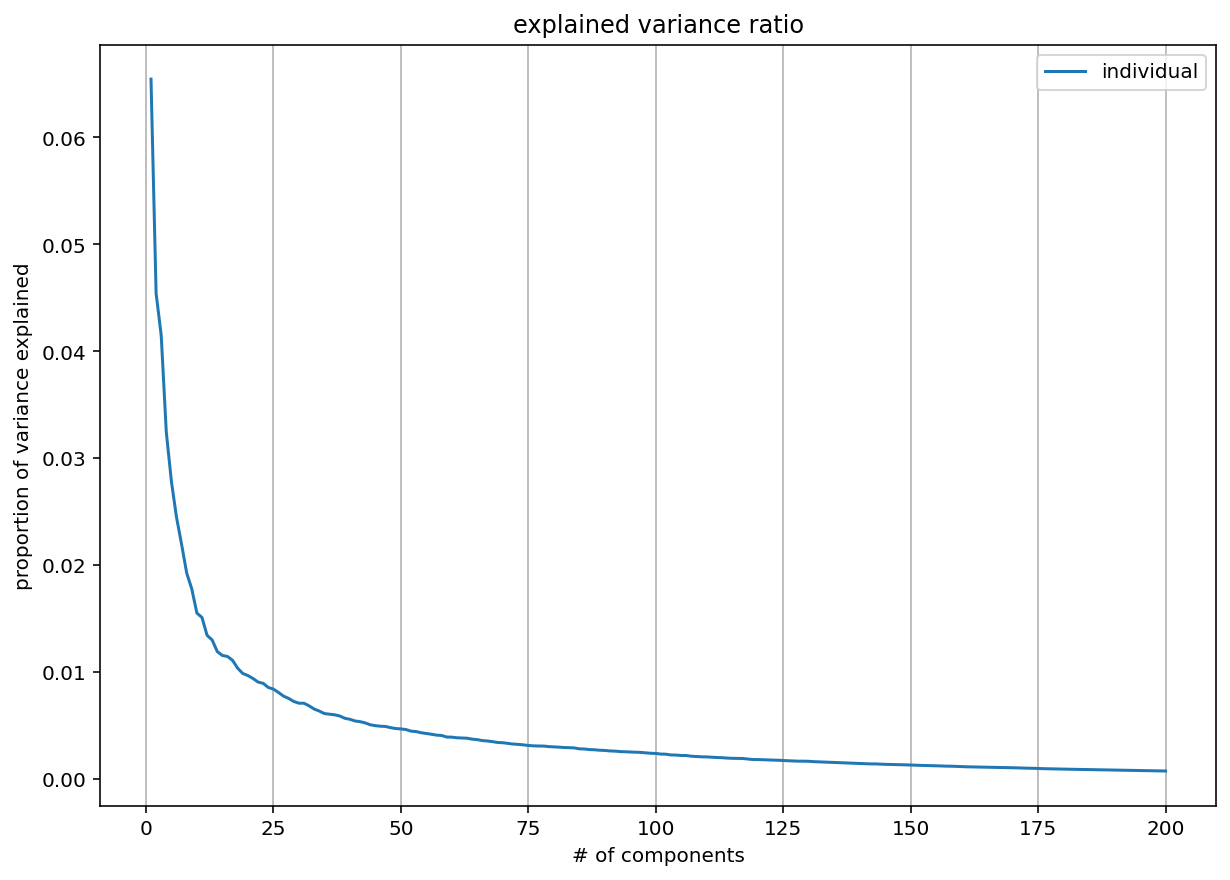

In [19]:
scree_plot(X_train, 200, False, False)

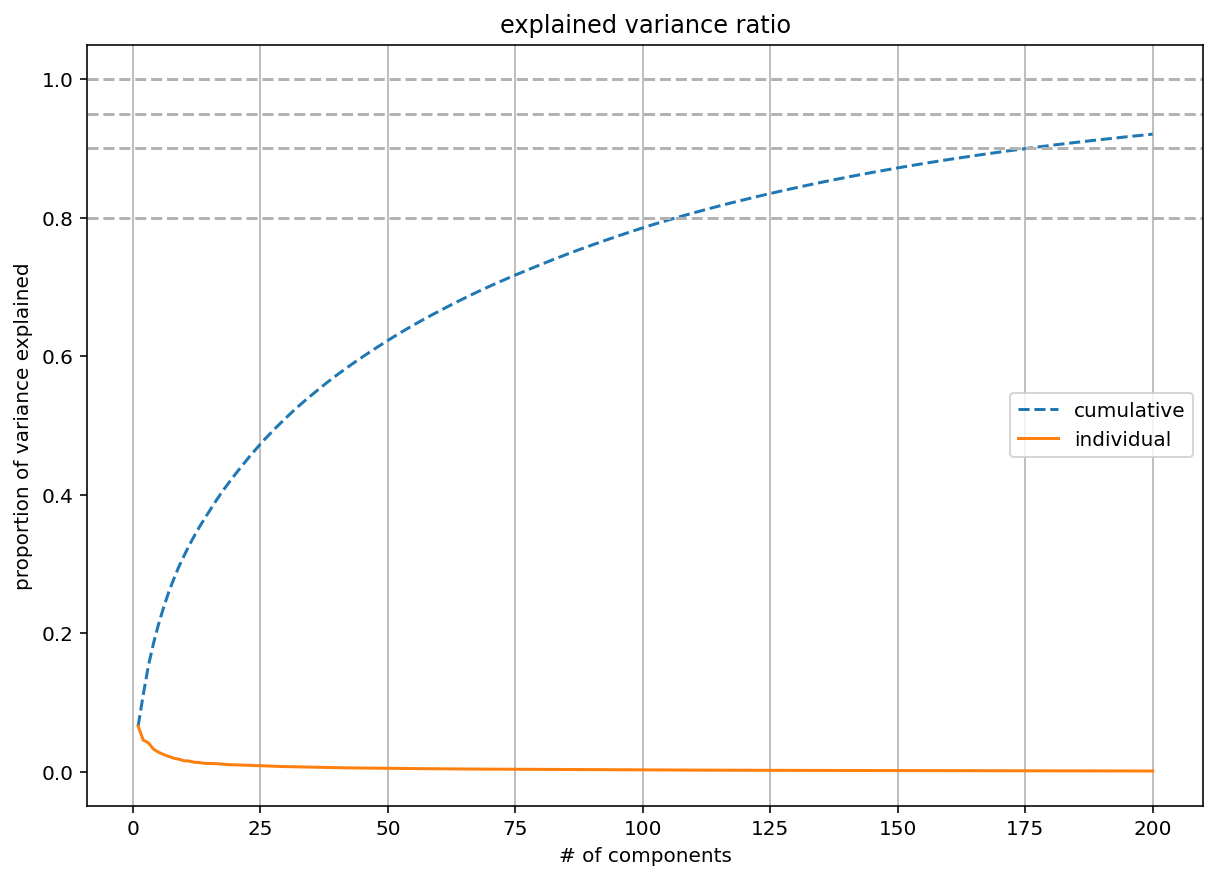

In [20]:
scree_plot(X_train, 200, True, False)

In [21]:
# If 0 < n_components < 1 and svd_solver == 'full', 
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(.90)
# pca = PCA(n_components=784)

pca.fit(X_train_t)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.n_components_

176

In [23]:
X_train_pca = pca.transform(X_train_t) # Apply dimensionality reduction to X_train_t
X_test_pca = pca.transform(X_test_t) # Apply dimensionality reduction to X_test_t

In [24]:
X_train_pca.shape

(4000, 176)

In [25]:
X_test_pca.shape

(1000, 176)

In [26]:
pca.components_.shape # Eigenvectors

(176, 784)

In [27]:
dpc=pd.DataFrame(pca.components_.T, 
                 index=X_train.columns, 
                 columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
dpc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
pixel1,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
pixel2,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
pixel3,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
pixel4,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
pixel5,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
pixel781,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
pixel782,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
pixel783,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0

## **compare image**

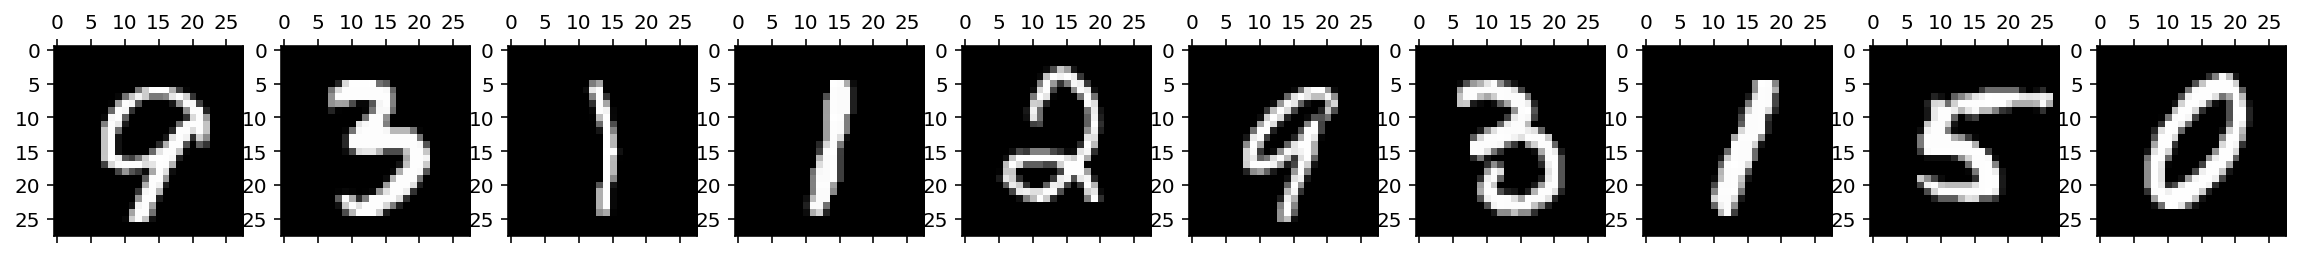

In [28]:
XT=X_train.to_numpy() # original X_train
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XT[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

In [29]:
print(f'X_train_pca.shape     = {X_train_pca.shape}')
print(f'pca.components_.shape = {pca.components_.shape}')
XP=np.dot(X_train_pca, pca.components_).round(4)
print(f'XP.shape              = {XP.shape}')
print(XP)

X_train_pca.shape     = (4000, 176)
pca.components_.shape = (176, 784)
XP.shape              = (4000, 784)
[[ 0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [ 0. -0. -0. ...  0.  0.  0.]
 ...
 [ 0. -0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]]


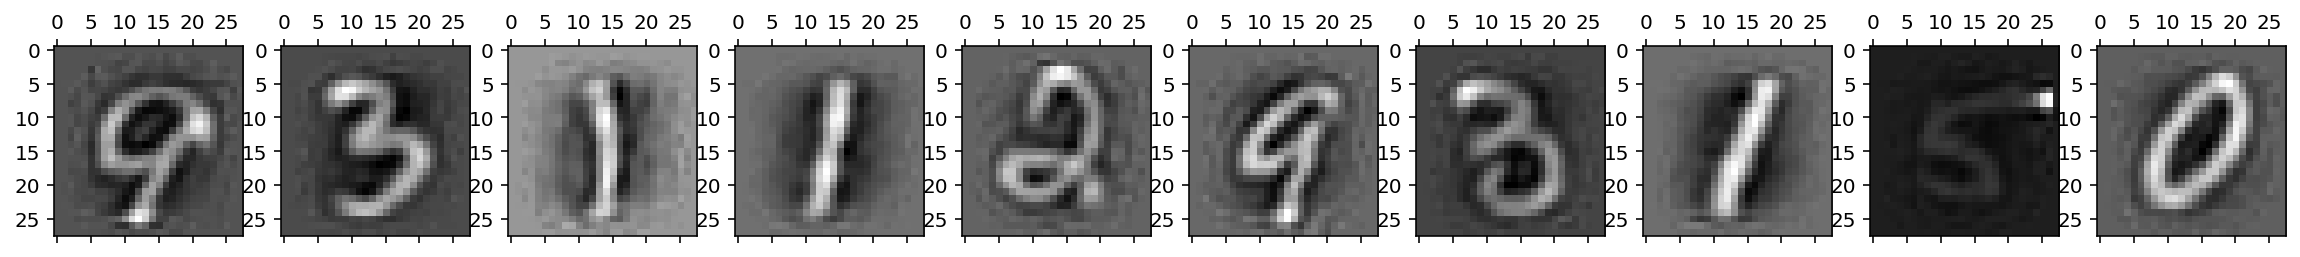

In [30]:
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XP[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

## **compare different components**

In [31]:
def plot_varying_components(dfX, n_img=10, n_components=[10, 20, 30, 50, 100, 200, 300], img_shape=(28, 28)):
    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train=dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width), cmap='gray') for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component}, {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width), cmap='gray') for i in range(n_img)]

n_component = 10, (4000, 10)
n_component = 50, (4000, 50)
n_component = 100, (4000, 100)
n_component = 200, (4000, 200)
n_component = 300, (4000, 300)


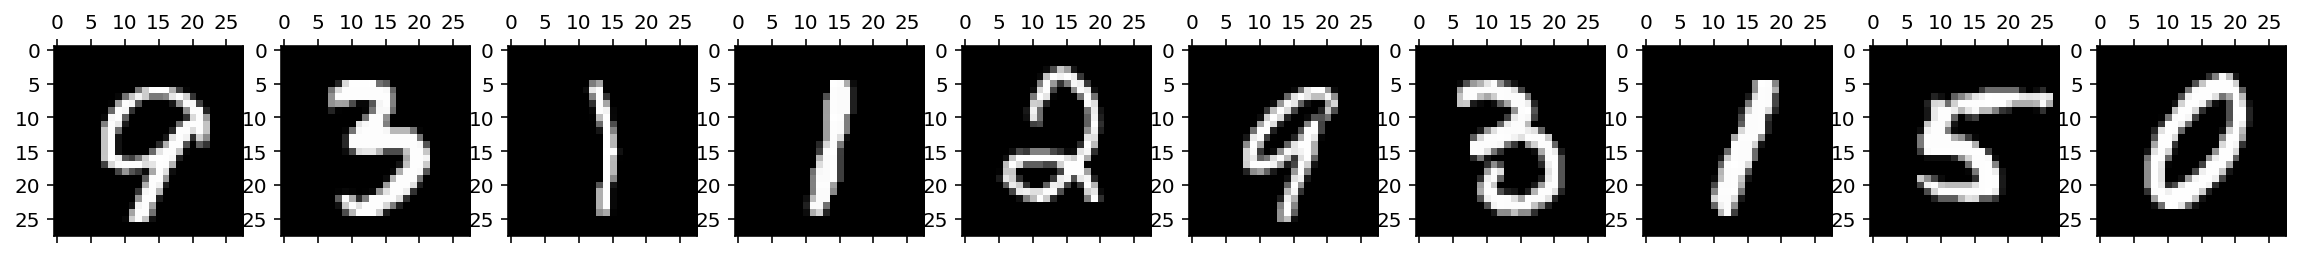

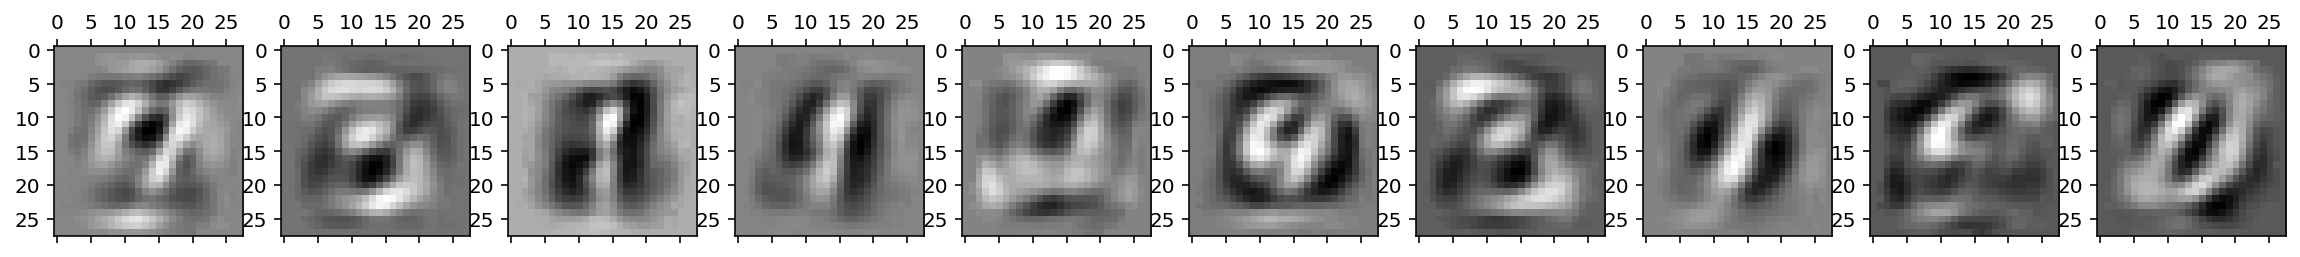

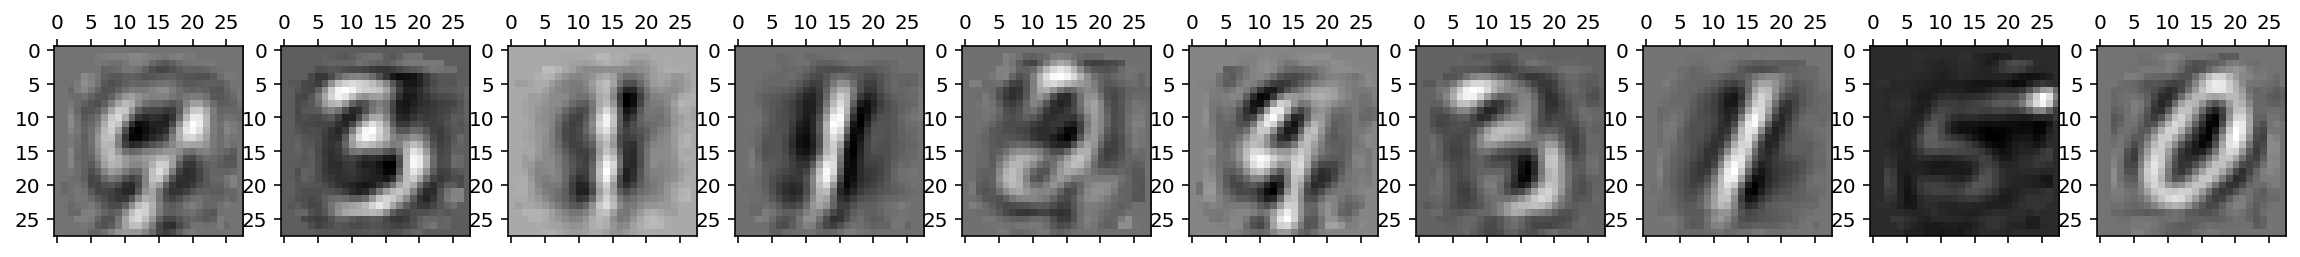

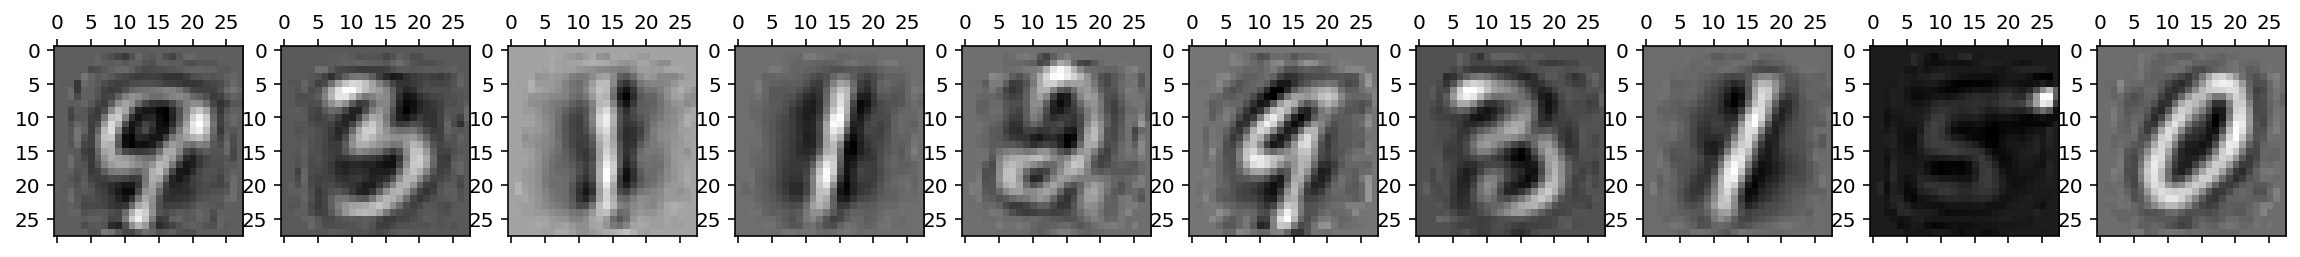

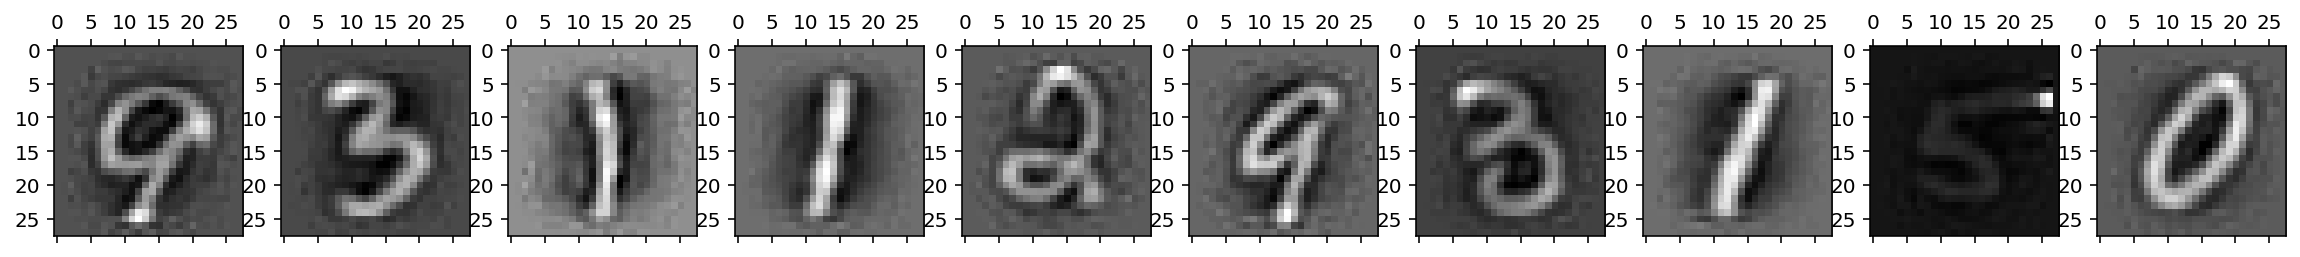

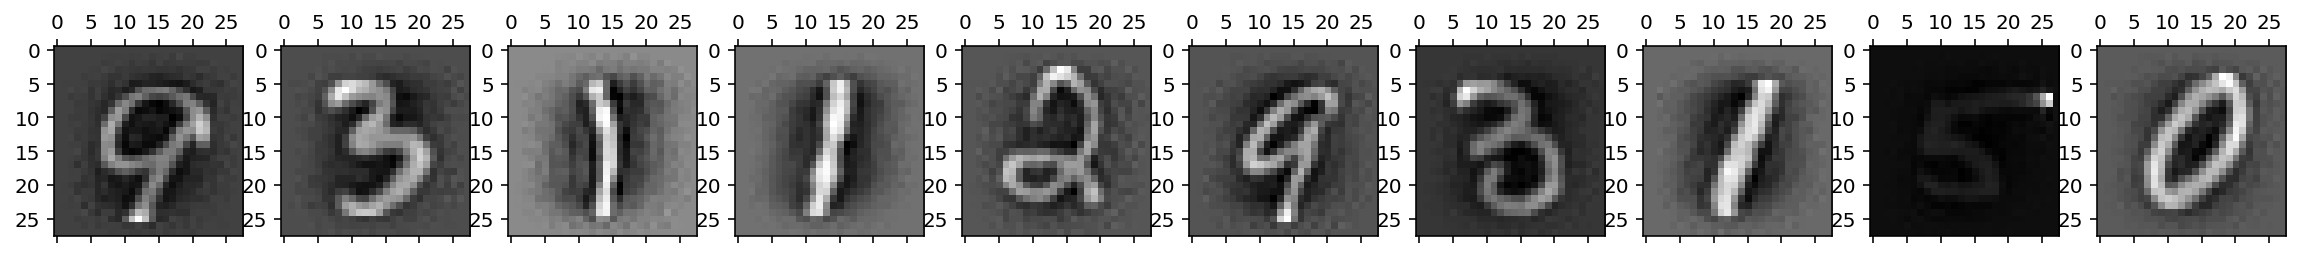

In [32]:
plot_varying_components(X_train, 10, [10, 50, 100, 200, 300], (28, 28))
# plot_varying_compoents(X_train, [10, 50, 100, 200, 300])

## **Classifier**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

## **run StandardScaler (mean=0, sd=1)¶**

In [34]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

# use all features in classifier

In [35]:
model = SVC(gamma='scale')
model = RandomForestClassifier()
model.fit(X_train_t, y_train)
train_score = model.score(X_train_t, y_train)
test_score = model.score(X_test_t, y_test)

print(f'accuracy (train) = {train_score:.4f}, accuracy (test) = {test_score:.4f}')

accuracy (train) = 1.0000, accuracy (test) = 0.9320


## **classify with reduced dimensions**

In [36]:
for n in [10, 50, 100, 200, 300]:
    pca=PCA(n)
    pca.fit(X_train_t)
    X_train_pca = pca.transform(X_train_t)
    X_test_pca = pca.transform(X_test_t)
    model = SVC(gamma='scale')
#     model = RandomForestClassifier()
    model.fit(X_train_pca, y_train)
    print(f'components = {n:3}({np.sum(pca.explained_variance_ratio_)*100:.2f}%), accuracy (train) = {model.score(X_train_pca, y_train):.4f}, accuracy (test) = {model.score(X_test_pca, y_test):.4f}')

components =  10(31.15%), accuracy (train) = 0.9155, accuracy (test) = 0.8720
components =  50(62.24%), accuracy (train) = 0.9722, accuracy (test) = 0.9270
components = 100(78.35%), accuracy (train) = 0.9748, accuracy (test) = 0.9290
components = 200(91.98%), accuracy (train) = 0.9810, accuracy (test) = 0.9230
components = 300(96.55%), accuracy (train) = 0.9815, accuracy (test) = 0.9190


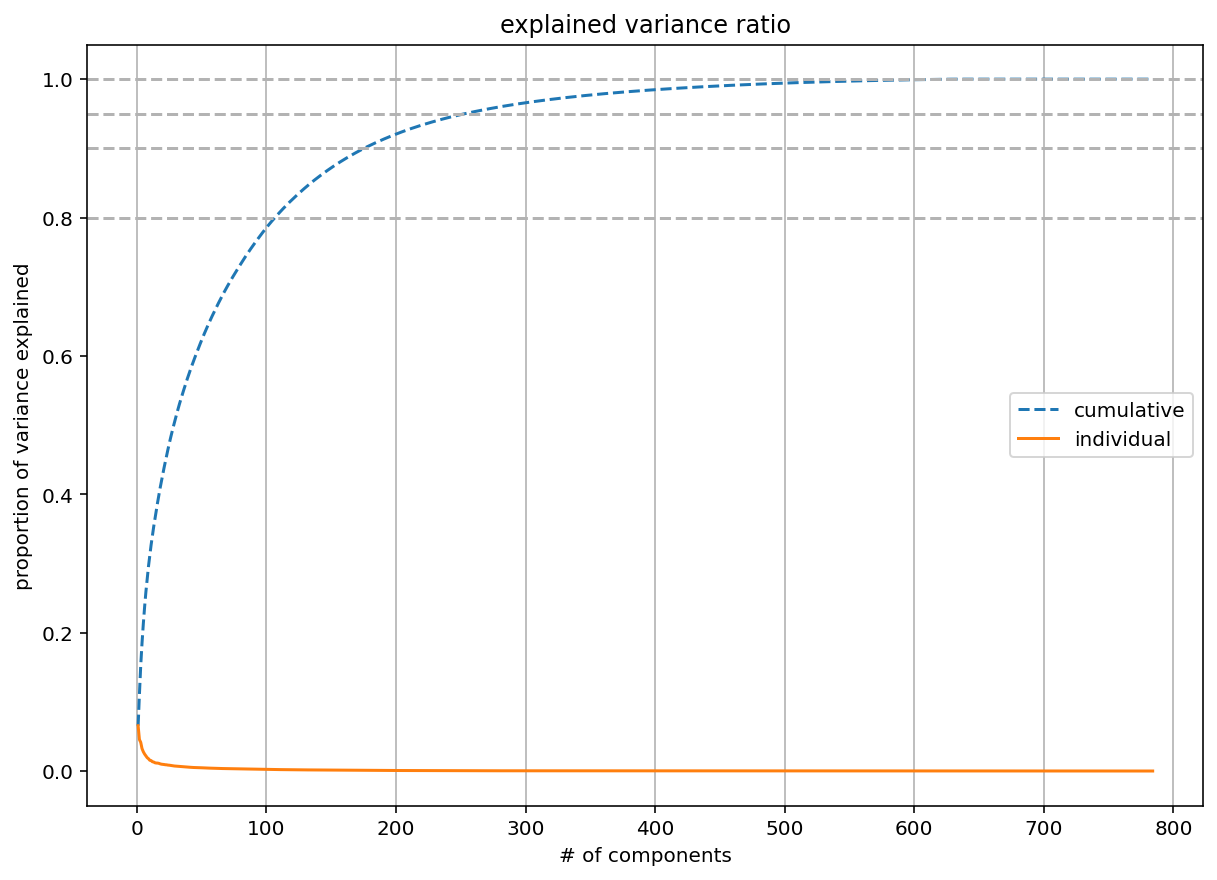

In [37]:
scree_plot(X_train, X_train.shape[1], True, False)